Laplace Transform
===============

The Laplace transform of a function $f(t)$ is defined by the equation
$$\mathcal{L}\{f(t)\} = F(s)=\int_{0}^\infty f(t) e^{-st}dt$$
where `s` is the complex frequency
$$s=\sigma +j\omega$$
and the function $f(t)$ is assumed to possess the property that
$f(t)=0$ for $t<0$<br>
Note that the Laplace transform is unilateral $(0\leq t < \infty)$, in contrast to the Fourier transform, which is bilateral $(-\infty <t<\infty)$. In our analysis of circuits using the Laplace transform, we will focus our attention on the time interval $t\geq 0$(causal system). It is the initial conditions that account for the operation of the circuit prior to $t = 0$; therefore, our analyses will describe the circuit operation for $t\geq 0$.
<br>
A function $f(t)$ may not have a Laplace transform $F(s)$ or $f(t)$ to have a Laplace transform when the integral in $\int_{0}^\infty f(t) e^{-st}dt$ must converge to a finite value. <br>Because $$|e^{j\omega t}
| = 1$$ for any value of $t$, the integral converges when
 $$\int_{0}^\infty |f(t)e^{(-\sigma +j\omega)t}|dt<\infty
 =\int_{0}^\infty e^{-\sigma t} |f(t)|dt<\infty$$

### [Region of Convergence (ROC)](https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Signal_Processing_and_Modeling/Book%3A_Signals_and_Systems_(Baraniuk_et_al.)/11%3A_Laplace_Transform_and_Continuous_Time_System_Design/11.06%3A_Region_of_Convergence_for_the_Laplace_Transform) also [see](http://fourier.eng.hmc.edu/e102/lectures/Laplace_Transform/node2.html)
$F(s)$ is undefined outside the region of convergence. Fortunately, all functions of interest in circuit analysis satisfy the
convergence criterion and have Laplace transforms

### Import library

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
sym.init_printing()

In [4]:
sym.__version__

'1.9'

In [2]:
t, s = sym.symbols('t, s')
a = sym.symbols('a', real=True, positive=True)

### Step input

The unit step function is also known as the Heaviside step function. We will see this function often in inverse laplace transforms. It is typeset as $\theta(t)$ by sympy.

In [9]:
step=sym.Heaviside(t)
step

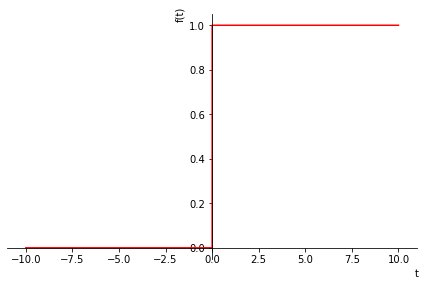

In [5]:
sym.plot(sym.Heaviside(t), line_color='red')

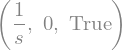

In [13]:
sym.laplace_transform(step, t, s)

### Impulse input

In [7]:
impulse=sym.DiracDelta(t)
impulse

In [8]:
sym.laplace_transform(impulse, t, s)

### Direct evaluation
We start with simple function

In [14]:
f=sym.exp(-a*t)
f

We can evaluate the integral directly using `integrate`

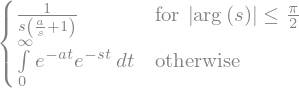

In [15]:
sym.integrate(f*sym.exp(-s*t), (t, 0, sym.oo))

This works, but it is a bit cumbersome to have all the extra stuff in there. 

Sympy provides a function called `laplace_transform` which does this more efficiently. By default it will return conditions of convergence as well (recall this is an improper integral, with an infinite bound, so it will not always converge).

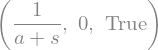

In [16]:
sym.laplace_transform(f, t, s)

If we want just the function, we can specify `noconds=True`.

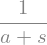

In [17]:
F = sym.laplace_transform(f, t, s, noconds=True)
F

We will find it useful to define a quicker version of this:

In [18]:
def L(f):
    return sym.laplace_transform(f, t, s, noconds=True)

Inverse laplace transform are simple as well

In [19]:
def invL(F):
    return sym.inverse_laplace_transform(F, s,t)

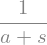

In [20]:
F=L(sym.exp(-a*t))
F

In [21]:
expr=invL(F)
expr

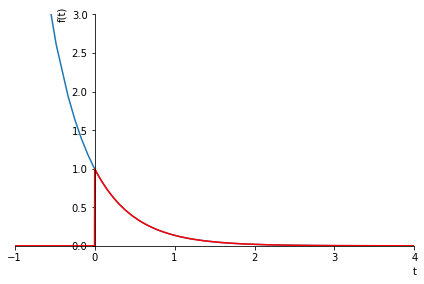

In [22]:
p = sym.plot(f.subs(a,2), invL(F).subs(a,2), 
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

In [23]:
omega = sym.Symbol('omega', real=True)
exp = sym.exp
sin = sym.sin
cos = sym.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

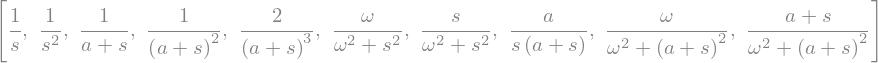

In [24]:
F=[L(f) for f in functions]
F

In [25]:
from pandas import DataFrame

In [43]:
def LatexFunction(func):
    return ["$${}$$".format(sym.latex(x)) for x in func]
table=DataFrame(LatexFunction(F), LatexFunction(functions)).reset_index()
table.columns=["Time Domain", "Laplace Domain"]
table

,Time Domain,Laplace Domain
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
6,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
7,$$1 - e^{- a t}$$,$$\frac{a}{s \left(a + s\right)}$$
8,$$e^{- a t} \sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + \left(a + s\right...
9,$$e^{- a t} \cos{\left(\omega t \right)}$$,$$\frac{a + s}{\omega^{2} + \left(a + s\right)...


### More complicated inverse

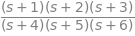

In [16]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))
F

In [17]:
F.apart(s)

Even sympy can benefit from a little help sometimes. When we try to calculate the inverse of $F$ we get a bit of a nasty answer:

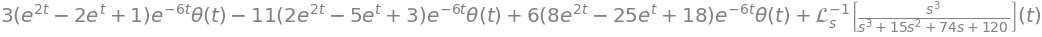

In [18]:
invL(F)

Perhaps it looks better if we simplify?

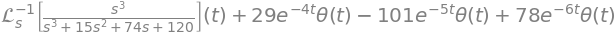

In [19]:
invL(F).simplify()

No, it still features an "unknown" laplace transform. If we do the partial fractions expansion first, we get a clean answer:

In [20]:
%%timeit
invL(F.apart(s))

1.1 s ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
invL(F.apart(s))

In [22]:
L(sym.DiracDelta(t))

Obtain the Laplace transform of $f(t) = \delta (t) + 2u(t)-3e^{-2t}u(t)$

In [23]:
delta=sym.DiracDelta(t)
step=sym.Heaviside(t)
exp2=sym.exp(-2*t)
f=delta+2*step-3*exp2*step
f

In [24]:
L(f)

Find the laplace transform $g(t)=10[u(t-2)-u(t-3)]$

In [25]:
g=10*sym.Heaviside(t-2)-10*sym.Heaviside(t-3)
g

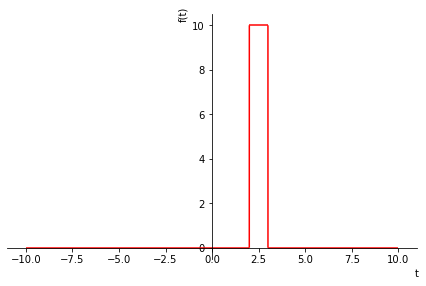

In [26]:
sym.plot(g, line_color='r')

In [27]:
L(g)

Find the inverse laplace transform $$F(s)=5+\dfrac{6}{s+4}-\dfrac{7s}{s^2+25}$$

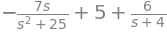

In [28]:
F=5+6/(s+4)-7*s/(s**2+25)
F

In [29]:
invL(F)

Find $f(t)$ given that $$F(s)=\dfrac {s^2+12}{s(s+2)(s+3)}$$

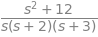

In [30]:
F=(s**2+12)/(s*(s+2)*(s+3))
F

In [31]:
F.apart(s)

In [32]:
invL(F.apart(s))

Calculate $f(t)$ given that $$F(s)=\dfrac {10s^2+4}{s(s+1)(s+2)^2}$$

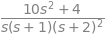

In [33]:
F=(10*s**2+4)/(s*(s+1)*(s+2)**2)
F

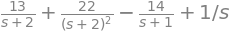

In [34]:
F.apart(s)

In [35]:
invL(F.apart(s))

Find the inverse transform of frequency domain function $$H(s)=\dfrac {20}{(s+3)(s^2+8s+25)}$$

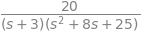

In [36]:
H=20/((s+3)*(s**2+8*s+25))
H

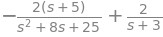

In [37]:
H.apart(s) #exist complex root

In [38]:
invL(H)

In [39]:
invL(H).simplify()